In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iter=10):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iter):
            for idx, sample in enumerate(X):
                linear_output = np.dot(sample, self.weights) + self.bias # 행렬곱 연산
                y_predicted = self.activation_function(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)  # 예측값 - 실제값 = 잔차
                self.weights += update * sample
                self.bias += update

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)

In [9]:

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary (AND)')
    plt.show()

예측 결과: [0 0 0 1]


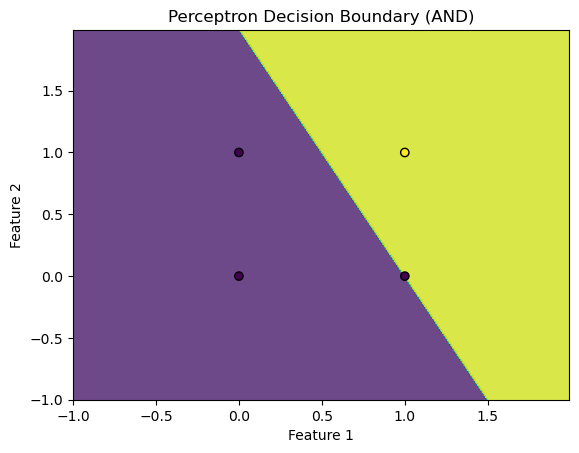

In [10]:

# AND 게이트
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# 퍼셉트론 학습시키기
model = Perceptron(learning_rate=0.1, n_iter=10)
model.fit(X, y)

predictions = model.predict(X)  # 예측
print("예측 결과:", predictions)

plot_decision_boundary(X, y, model)  # 시각화

예측 결과: [0 1 1 1]


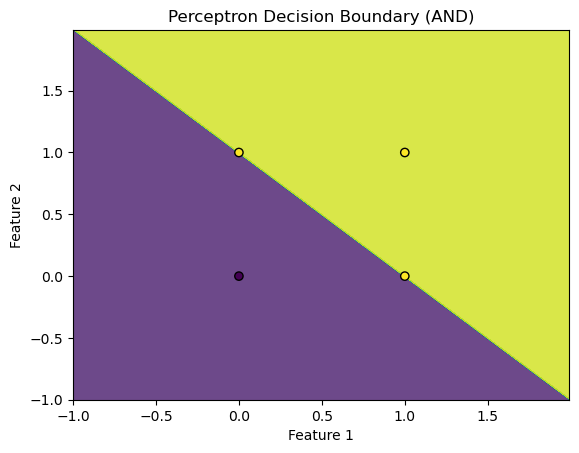

In [11]:

# OR 게이트
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

# 퍼셉트론 학습시키기
model = Perceptron(learning_rate=0.1, n_iter=10)
model.fit(X, y)

predictions = model.predict(X)  # 예측
print("예측 결과:", predictions)

plot_decision_boundary(X, y, model)  # 시각화

예측 결과: [1 1 1 0]


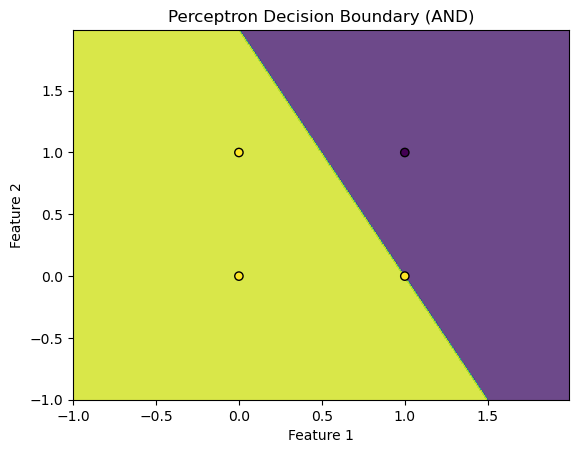

In [12]:

# NAND 게이트
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 1,1, 0])

# 퍼셉트론 학습시키기
model = Perceptron(learning_rate=0.1, n_iter=10)
model.fit(X, y)

predictions = model.predict(X)  # 예측
print("예측 결과:", predictions)

plot_decision_boundary(X, y, model)  # 시각화

예측 결과: [1 1 0 0]


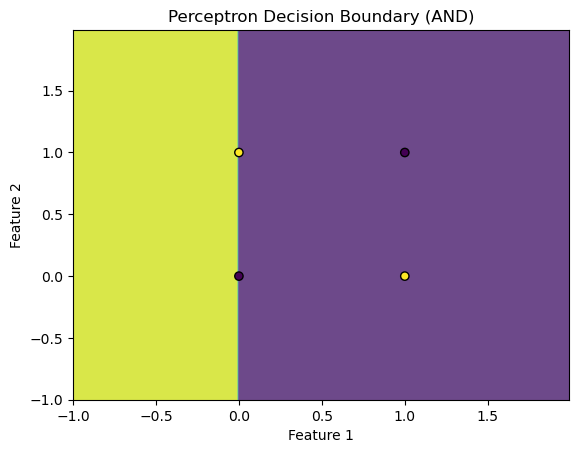

In [14]:

# NAND 게이트
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# 퍼셉트론 학습시키기
model = Perceptron(learning_rate=0.1, n_iter=10)
model.fit(X, y)

predictions = model.predict(X)  # 예측
print("예측 결과:", predictions)

plot_decision_boundary(X, y, model)  # 시각화

In [19]:
def AND_gate(x1,x2):
    w1 = 0.5
    w2 = 0.5
    b= -0.7
    result = x1*w1 + x2*w2 + b
    print(x1*w1, x2*w2,b)
    if result <= 0:
        return 0
    else:
        return 1

In [20]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

0.0 0.0 -0.7
0.0 0.5 -0.7
0.5 0.0 -0.7
0.5 0.5 -0.7


(0, 0, 0, 1)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Neural Network Decision Boundary (XOR)')
    plt.show()

In [3]:
# XOR 게이트
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [4]:
# MLP 모델 정의
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))  # 입력층
model.add(Dense(4, activation='relu'))  # 은닉층
model.add(Dense(1, activation='sigmoid'))  # 출력층
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # 컴파일

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.fit(X, y, epochs=500, verbose=0)  # 다층 퍼셉트론 학습시키기

In [12]:
predictions = model.predict(X)  # 예측
predictions = (predictions > 0.5).astype(int)  # 이진 데이터로 변환
print("예측 결과:\n", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
예측 결과:
 [[0]
 [1]
 [1]
 [0]]


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step


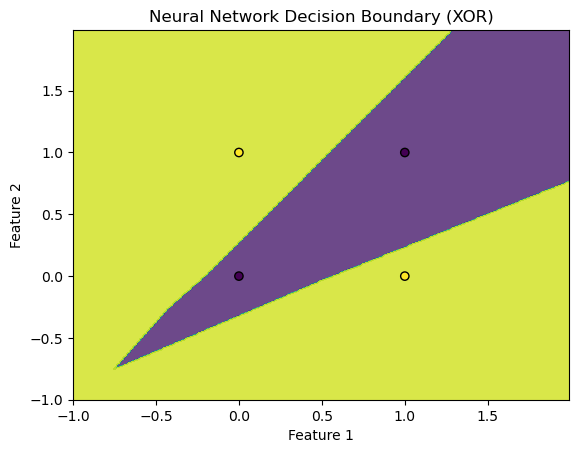

In [13]:
plot_decision_boundary(model, X, y)  # 시각화